In [5]:
from glob import glob
from PIL import Image
import numpy as np

img_paths = []
for labels in sorted(glob('../data/online_raw/*')):
    for image in sorted(glob(labels+'/*')):
        try:
            Image.open(image)
            img_paths.append(image)
        except:
            pass

In [6]:
import json
with open('pool.json', 'w') as f:
    json.dump({'PATH': img_paths}, f)

In [1]:
# PCA
import numpy as np
X = np.load('feature.npy').squeeze()
y = np.load('label.npy').squeeze()

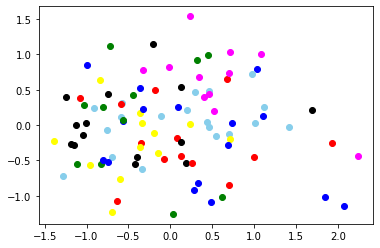

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
label_color_dict = {0:'red',1:'yellow',2:'green',3:'blue',4:'black',5:'magenta',6:'skyblue'}
for i in range(len(y)):
    plt.scatter(X_pca[i,0], X_pca[i,1], c=label_color_dict[y[i]])

In [3]:
import torch
import pickle
from generic_onlinelearner import CustomEncoderModel
encoder = CustomEncoderModel()
pretrained_dict = torch.load('best.pth')
model_dict = encoder.state_dict()
pretrained_dict = {k:v for k,v in pretrained_dict.items() if k in model_dict}
model_dict.update(pretrained_dict)
encoder.load_state_dict(model_dict)
with open('best.pkl', 'wb') as f:
    pickle.dump(encoder, f)